In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 32 kB/s 
     |████████████████████████████████| 198 kB 59.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=4e22aecaf67cc8b40794b7413fa564aa3a9e354e90bbe21829db65ad6e17232e
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
# import all required modules
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from pyspark import SparkContext
from  pyspark.sql  import SQLContext
from pyspark.sql.functions import mean, min, max, avg, stddev, desc, isnull, col, log, lit
from pyspark.mllib.stat import Statistics
from pyspark.sql.types import DoubleType

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql.types import *
spark = pyspark.sql.SparkSession.builder.appName("Spark-Dataframe-SQL-real-estate").getOrCreate()

In [ ]:
!pip -q install pyspark flasgger

     |████████████████████████████████| 3.8 MB 7.0 MB/s 


In [ ]:
import plotly.express as px
from pyspark.sql import SparkSession, functions as f

In [ ]:
spark = SparkSession.builder.master('local[3]').appName('Realestate').getOrCreate()

In [ ]:
import pandas 


In [ ]:
df = spark.read.csv('/content/project_data_real_estate_toulouse_and_suburb.csv',header=True,inferSchema=True)

In [ ]:
df.show(5)

+----------+--------+--------+--------+-------------------+-------+------+-------------+----------+--------+
|  SaleDate|SaleType|   Price|PostCode|               City|NbRooms|NbLots|ResidenceType|LivingArea|LandArea|
+----------+--------+--------+--------+-------------------+-------+------+-------------+----------+--------+
|15/01/2019|    SALE| 95000.0|   31270|VILLENEUVE TOLOSANE|      2|     0|        HOUSE|        45|     505|
|21/01/2019|    SALE|261700.0|   31270|VILLENEUVE TOLOSANE|      4|     0|        HOUSE|        87|     311|
|03/01/2019|    SALE|101000.0|   31270|VILLENEUVE TOLOSANE|      2|     1|    APARTMENT|        44|       0|
|11/01/2019|    SALE| 59500.0|   31270|VILLENEUVE TOLOSANE|      1|     1|    APARTMENT|        26|       0|
|15/01/2019|    SALE|179000.0|   31270|VILLENEUVE TOLOSANE|      4|     0|        HOUSE|        95|     263|
+----------+--------+--------+--------+-------------------+-------+------+-------------+----------+--------+
only showing top 5 

In [117]:
dfschema = StructType([StructField("SaleDate", StringType(), False),
                       StructField("SaleType", StringType(),False),
                       StructField("Price", IntegerType(), False),
                       StructField("PostCode", StringType(), False),
                       StructField("City", StringType(), False),
                       StructField("NbRooms",IntegerType(),False),
                       StructField("NbLots",IntegerType(),False),
                       StructField("ResidenceType", StringType(), False),
                       StructField("LivingArea", IntegerType(), False),
                       StructField("LandArea", IntegerType(), False) ])

In [118]:
df = spark.read.csv('/content/project_data_real_estate_toulouse_and_suburb.csv',schema=dfschema)
df.show(5)


+----------+--------+------+--------+-------------------+-------+------+-------------+----------+--------+
|  SaleDate|SaleType| Price|PostCode|               City|NbRooms|NbLots|ResidenceType|LivingArea|LandArea|
+----------+--------+------+--------+-------------------+-------+------+-------------+----------+--------+
|  SaleDate|SaleType|  null|PostCode|               City|   null|  null|ResidenceType|      null|    null|
|15/01/2019|    SALE| 95000|   31270|VILLENEUVE TOLOSANE|      2|     0|        HOUSE|        45|     505|
|21/01/2019|    SALE|261700|   31270|VILLENEUVE TOLOSANE|      4|     0|        HOUSE|        87|     311|
|03/01/2019|    SALE|101000|   31270|VILLENEUVE TOLOSANE|      2|     1|    APARTMENT|        44|       0|
|11/01/2019|    SALE| 59500|   31270|VILLENEUVE TOLOSANE|      1|     1|    APARTMENT|        26|       0|
+----------+--------+------+--------+-------------------+-------+------+-------------+----------+--------+
only showing top 5 rows



In [119]:
df.toPandas().shape

(80119, 10)

In [120]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80119 entries, 0 to 80118
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SaleDate       80119 non-null  object 
 1   SaleType       80119 non-null  object 
 2   Price          77105 non-null  float64
 3   PostCode       80119 non-null  object 
 4   City           80119 non-null  object 
 5   NbRooms        80118 non-null  float64
 6   NbLots         80118 non-null  float64
 7   ResidenceType  80119 non-null  object 
 8   LivingArea     80118 non-null  float64
 9   LandArea       80118 non-null  float64
dtypes: float64(5), object(5)
memory usage: 6.1+ MB


In [121]:
#describe()
df.toPandas().describe()

,Price,NbRooms,NbLots,LivingArea,LandArea
count,7.710500e+04,80118.000000,80118.000000,80118.000000,80118.000000
mean,5.521475e+05,3.000100,1.037045,66.892758,254.026623
std,2.435570e+06,1.351122,0.829138,35.895210,1369.236760
min,0.000000e+00,1.000000,0.000000,1.000000,0.000000
25%,1.225000e+05,2.000000,0.000000,43.000000,0.000000
50%,1.800000e+05,3.000000,1.000000,62.000000,0.000000
75%,2.800000e+05,4.000000,2.000000,82.000000,113.000000
max,3.342722e+07,41.000000,13.000000,481.000000,60792.000000


II : Exploratory Data Analysis with insigths

The evolution of price per square meter

In [122]:
import pyspark.sql.functions as f

evolution_price= df.groupBy('SaleDate')\
                                         .agg(f.sum('Price')/f.sum('LivingArea'))\
                                         .withColumnRenamed('(sum(Price) / sum(LivingArea))', 'Price_square')\
                                         .orderBy('Price_square', ascending=False)

evolution_price.show(10)

+----------+------------------+
|  SaleDate|      Price_square|
+----------+------------------+
|08/04/2015| 384811.7825821581|
|20/01/2016|164424.27136203783|
|31/01/2019|145157.12641660016|
|18/12/2017| 108949.8592786478|
|27/04/2017| 83517.23271539781|
|16/12/2016| 75374.22460722829|
|06/12/2017| 68814.54915790989|
|03/11/2016|50242.938456632655|
|21/12/2016|38760.206654212256|
|14/09/2018| 23899.40783490731|
+----------+------------------+
only showing top 10 rows



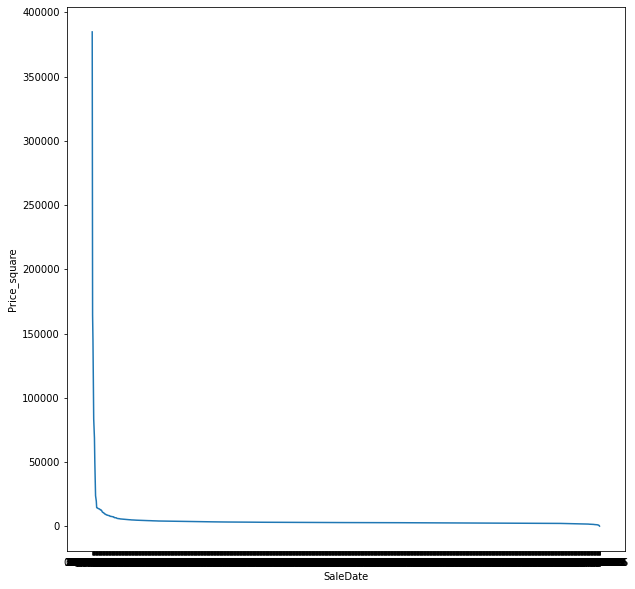

In [123]:
plt.figure(figsize=(10,10))
sns.lineplot(x='SaleDate',y='Price_square' ,data=evolution_price.toPandas())

In [ ]:
df_evolution_price=evolution_price.toPandas()
df_evolution_price.set_index("SaleDate",inplace=True)

The evolution of the price per square meter per City

In [ ]:
import pyspark.sql.functions as f

evolution_price_per_city = df.groupBy('City')\
                                         .agg(f.sum('Price')/f.sum('LivingArea'))\
                                         .withColumnRenamed('(sum(Price) / sum(LivingArea))', 'Price_square')\
                                         .orderBy('Price_square', ascending=False)

evolution_price_per_city .show(10)

+--------------------+------------------+
|                City|      Price_square|
+--------------------+------------------+
|          SAINT-JEAN|10256.016765394987|
|            TOULOUSE|10096.963393744883|
|              PIBRAC| 8009.514431632145|
|             BLAGNAC| 7267.698062792251|
|             CUGNAUX| 6961.905634660357|
|          AUCAMVILLE| 6901.880151114469|
|RAMONVILLE-SAINT-...| 5812.235803423056|
|           COLOMIERS| 4169.699389106932|
| VILLENEUVE TOLOSANE| 4142.363330546211|
|       TOURNEFEUILLE|3971.5711923445724|
+--------------------+------------------+
only showing top 10 rows



In [ ]:
df_evolution= evolution_price_per_city.toPandas()

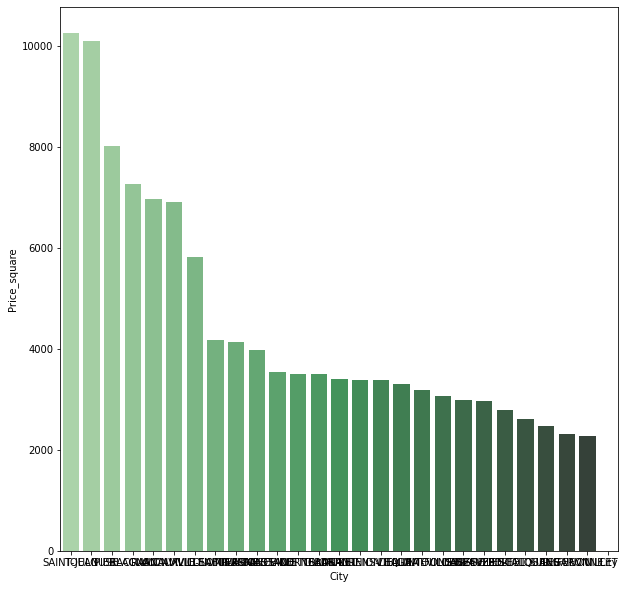

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='City',y='Price_square' ,data=df_evolution,palette='Greens_d')

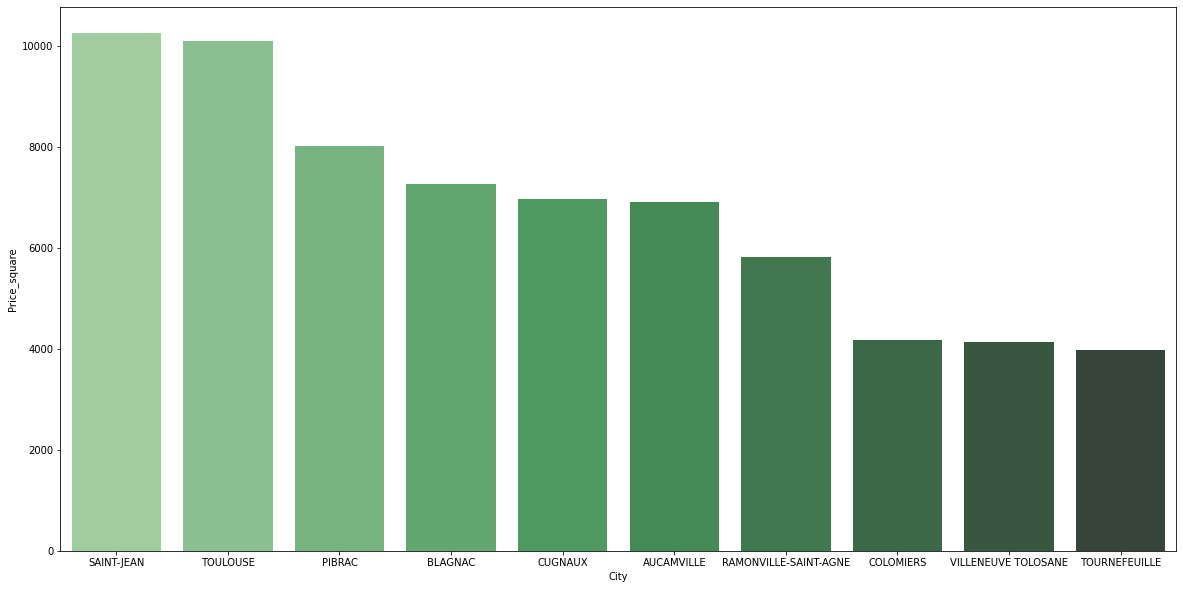

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='City',y='Price_square' ,data=df_evolution.head(10),palette='Greens_d')

Differences between apartment and houses
According to the price per square
For the Apartement

In [ ]:
import pyspark.sql.functions as f

apartement = df.filter("ResidenceType=='APARTMENT'")\
                                         .groupBy('City')\
                                         .agg(f.sum('Price')/f.sum('LivingArea'))\
                                         .withColumnRenamed('(sum(Price) / sum(LivingArea))', 'Price_square')\
                                         .orderBy('Price_square', ascending=False)

apartement.show(10)

+--------------------+------------------+
|                City|      Price_square|
+--------------------+------------------+
|             CUGNAUX|11788.791624446092|
|            TOULOUSE|11466.768596137692|
|    VIEILLE TOULOUSE|           11000.0|
|          AUCAMVILLE|10551.061783856017|
|             BLAGNAC| 9300.502842041418|
| VILLENEUVE TOLOSANE| 7638.921425950838|
|RAMONVILLE-SAINT-...| 7039.620997327777|
|               MURET| 6066.241258542142|
|        CORNEBARRIEU| 5863.061381971238|
|           COLOMIERS|5589.4168992497425|
+--------------------+------------------+
only showing top 10 rows



In [ ]:
df_appartement= apartement.toPandas()

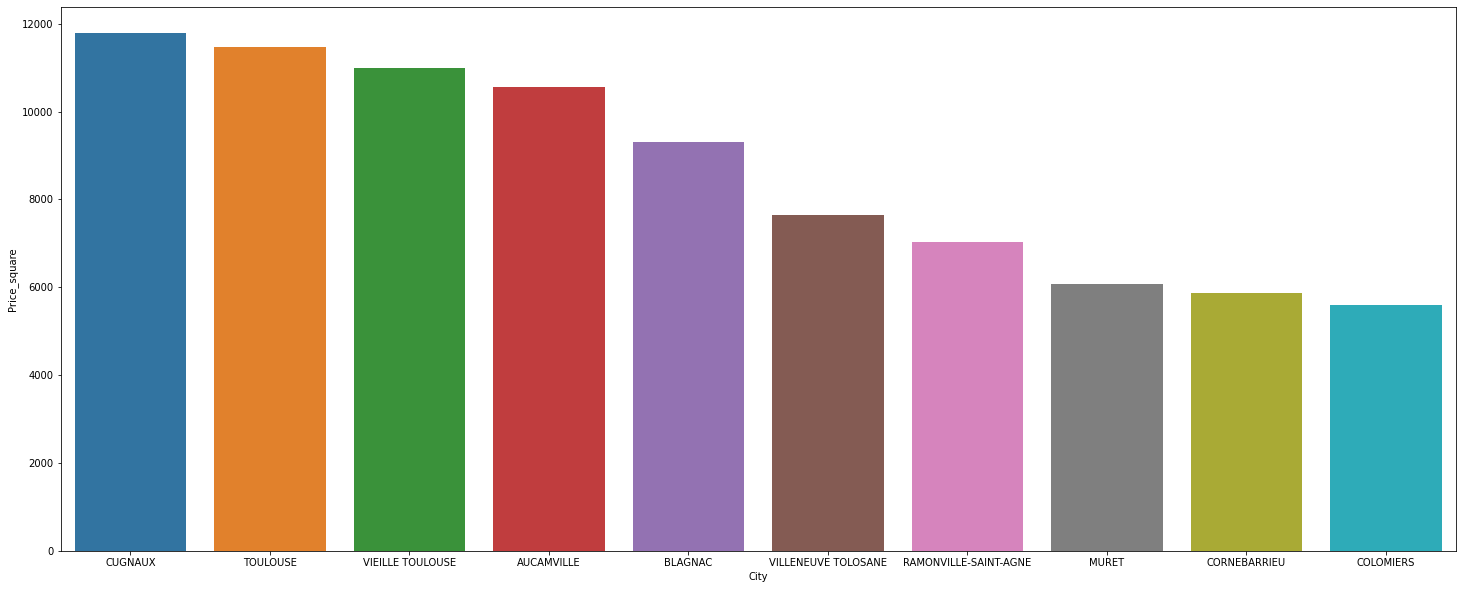

In [ ]:
#for the top 10 city
plt.figure(figsize=(25,10))
sns.barplot(x='City',y='Price_square' ,data=df_appartement.head(10))

For Houses

In [ ]:
import pyspark.sql.functions as f

House = df.filter("ResidenceType=='HOUSE'")\
                                         .groupBy('City')\
                                         .agg(f.sum('Price')/f.sum('LivingArea'))\
                                         .withColumnRenamed('(sum(Price) / sum(LivingArea))', 'Price_square')\
                                         .orderBy('Price_square', ascending=False)

House.show(10)

+--------------------+------------------+
|                City|      Price_square|
+--------------------+------------------+
|          SAINT-JEAN|14871.181122078677|
|              PIBRAC| 8991.726182149594|
|            TOULOUSE| 4813.766621941643|
|  PLAISANCE DU TOUCH| 3756.353824686033|
|               BALMA|  3589.97444121769|
|SAINT-ORENS-DE-GA...|3581.4557160048134|
|             BLAGNAC|3239.5740359190963|
|    CASTANET TOLOSAN|3206.3370767562355|
|    VIEILLE TOULOUSE|         3148.2884|
|       TOURNEFEUILLE|3144.7848954280353|
+--------------------+------------------+
only showing top 10 rows



In [ ]:
df_house= House.toPandas()

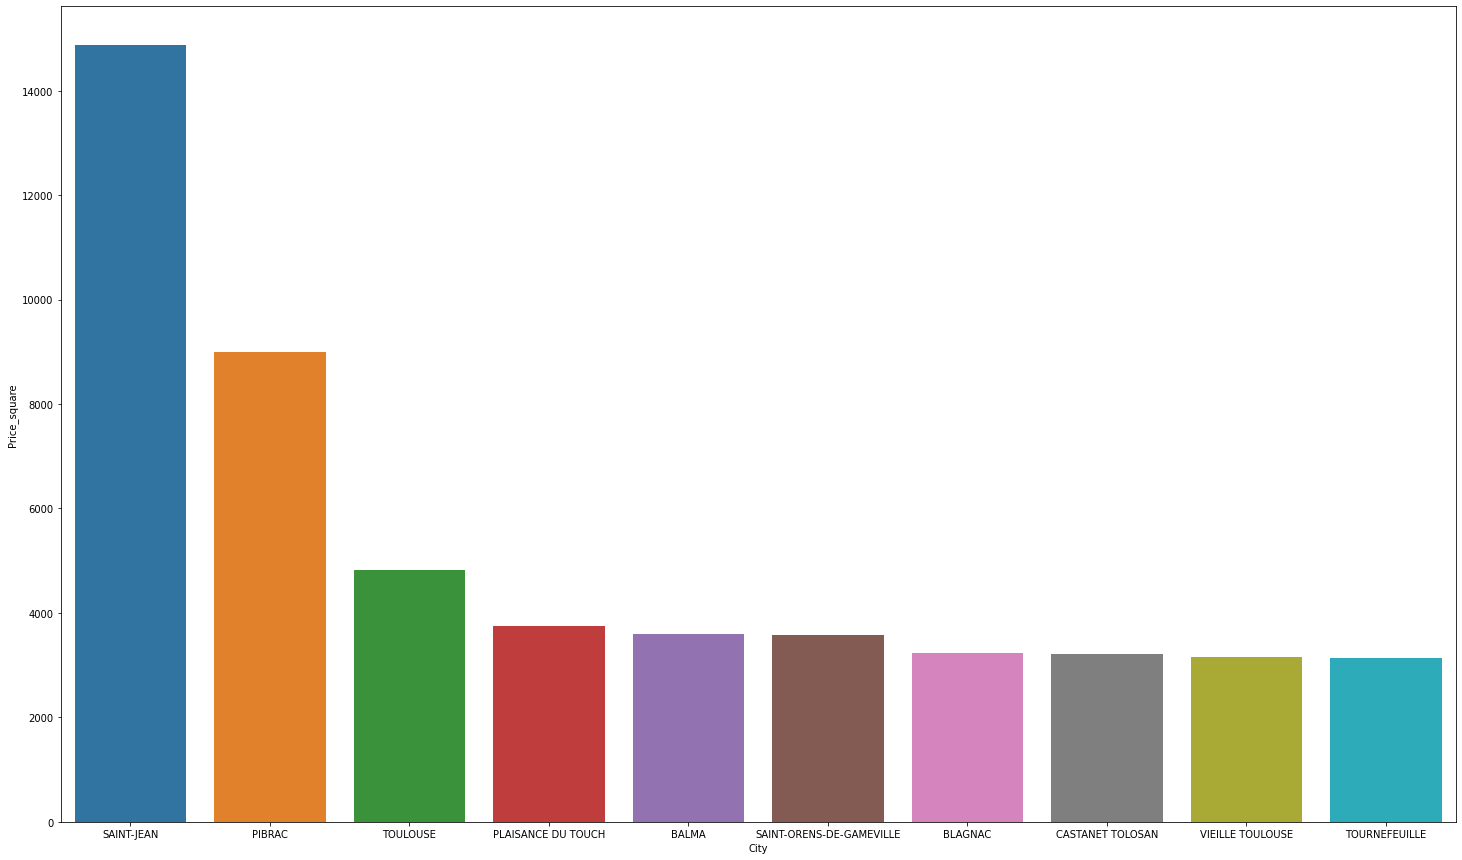

In [ ]:
plt.figure(figsize=(25,15))
sns.barplot(x='City',y='Price_square' ,data=df_house.head(10))

In [ ]:
number_of_residence= df.filter("City=='TOULOUSE'").groupBy('ResidenceType').count()
number_of_residence.show()

+-------------+-----+
|ResidenceType|count|
+-------------+-----+
|        HOUSE| 6191|
|    APARTMENT|45606|
+-------------+-----+



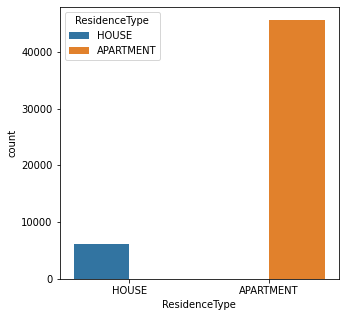

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='ResidenceType',y='count',hue='ResidenceType' , data=number_of_residence.toPandas())

In [ ]:
number_of_residence_real_estate= df.filter("City!='TOULOUSE'").groupBy('ResidenceType').count()
number_of_residence_real_estate.show()

+-------------+-----+
|ResidenceType|count|
+-------------+-----+
|        HOUSE|11439|
|    APARTMENT|16882|
|ResidenceType|    1|
+-------------+-----+



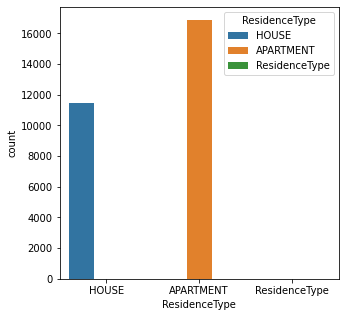

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='ResidenceType',y='count',hue='ResidenceType' , data=number_of_residence_real_estate.toPandas())

In [ ]:
number_of_room_toulouse= df.filter("City=='TOULOUSE'").groupBy('ResidenceType').mean()
number_of_room_toulouse.show()

+-------------+-----------------+-----------------+-------------------+------------------+------------------+
|ResidenceType|       avg(Price)|     avg(NbRooms)|        avg(NbLots)|   avg(LivingArea)|     avg(LandArea)|
+-------------+-----------------+-----------------+-------------------+------------------+------------------+
|        HOUSE|511179.0295469468|4.347762881602326|0.17057018252301728|104.49297367145857|493.43110967533516|
|    APARTMENT| 651202.838807329|2.547537604701136| 1.2188966364074902| 54.70964346796474| 155.0749682059378|
+-------------+-----------------+-----------------+-------------------+------------------+------------------+



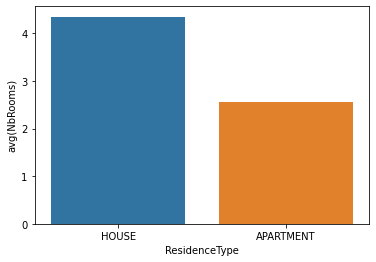

In [ ]:
sns.barplot(x='ResidenceType',y='avg(NbRooms)',data=number_of_room_toulouse.toPandas())

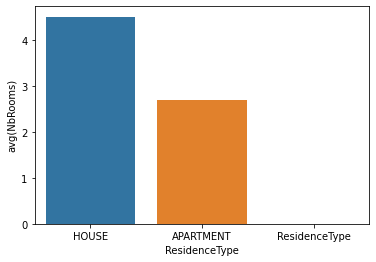

In [ ]:
number_of_room_real_estate= df.filter("City!='TOULOUSE'").groupBy('ResidenceType').mean()
sns.barplot(x='ResidenceType',y='avg(NbRooms)',data=number_of_room_real_estate.toPandas())

Identification of sales outliers
This graph shows that the distribution is skewed to the left with a mean price equal to 4200 and the minimum price is below 4000, while the maximum price is 8500 with the existence of some outliers price which are equal to approximately 12000 and 1400

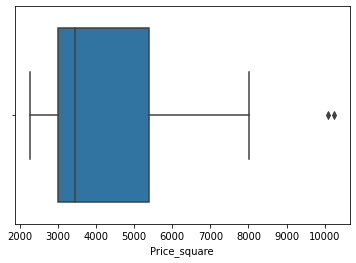

In [ ]:
sns.boxplot(x='Price_square', data=df_evolution)

Differences between types of Saletype
For House

In [ ]:
Differences_between_types_of_sales = df.filter("ResidenceType=='HOUSE'").groupBy('SaleType').sum()
                                           
Differences_between_types_of_sales.show(10)

+--------------------+----------+------------+-----------+---------------+-------------+
|            SaleType|sum(Price)|sum(NbRooms)|sum(NbLots)|sum(LivingArea)|sum(LandArea)|
+--------------------+----------+------------+-----------+---------------+-------------+
|SALE BEFORE COMPL...| 215383360|        2796|        800|          59342|        32386|
|                SALE|7535794041|       75789|       2248|        1826784|      9908893|
+--------------------+----------+------------+-----------+---------------+-------------+



In [ ]:
df_Differences_between_types_of_sales= Differences_between_types_of_sales.toPandas()

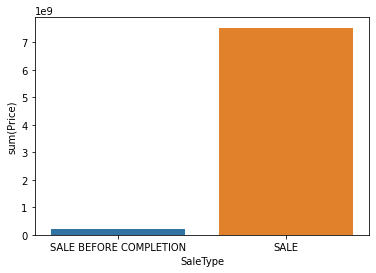

In [ ]:
sns.barplot(x='SaleType',y='sum(Price)',data=df_Differences_between_types_of_sales)